# Predictive modelling 
## Dataset: ["Breast cancer"](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

## Dataset exploration

In [41]:
# Imports

from sklearn.datasets import load_breast_cancer

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

import pandas as pd

import numpy as np

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

### Dataset description

In [42]:
# Load data
data = load_breast_cancer()

# Assign data and target to X, y variables 
X = data.data
y = data.target
targetNames = data.target_names

**"Breast cancer"** dataset includes **30 features per sample** concerning different **medical measurements on breasts attributes**. Each sample has a possible **binary label**: 0 for malignant and 1 for bening tumor. Features are **real positive numbers**, see the list of names below:

In [43]:
# Show first sample data 
dataFrame = pd.DataFrame(X, columns=data.feature_names)
dataFrame.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [44]:
# Number of classes
print("Classes:" + str(targetNames))

# Number of samples and dimensions
print("Number of samples andnumber of features:" + str(X.shape))


# Number of samples per class
unique, counts = np.unique(y, return_counts = True)
print("Number of samples per class: " + str(dict(zip(unique, counts))))

Classes:['malignant' 'benign']
Number of samples andnumber of features:(569, 30)
Number of samples per class: {0: 212, 1: 357}


### Visualization of the data using PCA

We can visualize the data with the help of Principal Component Analysis (PCA) that is a dimensionality reduction technique, which finds a linear combination of the variables that contains most of the information. 
The new variables are called “principal components” and are the directions that maximize the variance of the data.

We represent data using **2 components**:

Variance retention using 2 components: 99.82211613741715 %


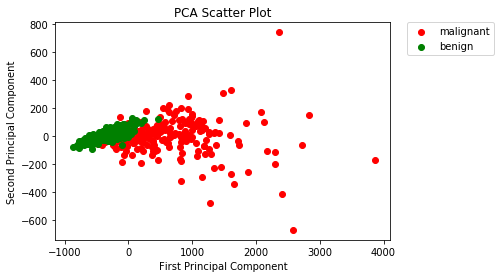

In [45]:
# PCA
myPCA = PCA(n_components = 2)
X_PCA = myPCA.fit_transform(X)

# variance ratio
print ("Variance retention using 2 components: " + 
       str((np.sum(myPCA.fit(X).explained_variance_ratio_))*100) + " %")


# Plot PCA
colors = ['red', 'green']

for i in range(len(colors)):
    xPlot = X_PCA[:, 0][y == i]
    yPlot = X_PCA[:, 1][y == i]
    plt.scatter(xPlot, yPlot, c=colors[i])
    plt.legend(targetNames, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

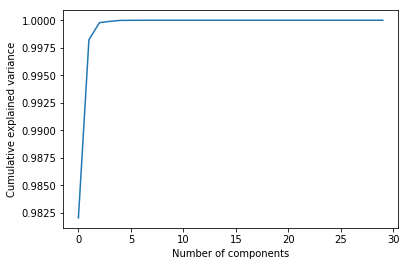

In [46]:
plt.plot(np.cumsum(PCA().fit(X).explained_variance_ratio_))
plt.xlabel('Number of components')

plt.ylabel('Cumulative explained variance');
plt.show()

##  split data into Train, Test


I have choose the splitting CV method "StratifiedShuffleSplit".
That method shuffles the dataset so the same proportion of samples per class in both Train and Test splits.
I have choose the sizes train/test splits have been 70%-30% 
For "random_state" attribute we are indicating a seed used by the random number generator for performing the splits 

In [47]:
## Split the data into Train, Test sets

myStratifiedShuffleSplit = StratifiedShuffleSplit(1, 0.3, random_state = 42)

for train_index, test_index in myStratifiedShuffleSplit.split(X, y):
    XTrain = X[train_index,:]
    XTest = X[test_index,:]
    yTrain = y[train_index]
    yTest = y[test_index]

# Sizes of each data split
print("XTrain number of samples and dimensions : " +str(XTrain.shape))
print("yTrain number of labels for : " +str(yTrain.shape))
print("XTest number of samples and dimensions for : " +str(XTest.shape))
print("yTest number of labels for : " +str(yTest.shape))

XTrain number of samples and dimensions : (398, 30)
yTrain number of labels for : (398,)
XTest number of samples and dimensions for : (171, 30)
yTest number of labels for : (171,)


##  select models



- K NEAREST NEIGHBORS (kNN).

    
The number of neighbors is the regularization parameter for this model, increasing the model complexity inversely to the number of neighbors. 

- LOGISTIC REGRESSION

Despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function. [[2]](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) [[3]](https://en.wikipedia.org/wiki/Logistic_function)

C is the regularization parameter for this model. Parameter **C = 1/λ**. 

Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
    

Logistic regression is a classification algorithm traditionally limited to only two-class classification problems. If we have more than two classes then next model, Linear Discriminant Analysis, is the preferred linear classification technique.

- DECISION TREE CLASSIFIER

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. [[7]](http://scikit-learn.org/stable/modules/tree.html)

Decision tree is a classifier in the form of a tree structure. Important parameters are:

• **Decision node**: specifies a test on a single attribute

• **Leaf node**: indicates the value of the target attribute

• **Arc/edge**: split of one attribute

• **Path**: a disjunction of test to make the final prediction/decision

Decision trees classify instances or examples by starting at the root of the tree and moving through it until a leaf node.

- GAUSSIAN NAIVE BAYES

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. In Gaussian Naive Bayes, likelihood of the features is assumed to be Gaussian: [[8]](http://scikit-learn.org/stable/modules/naive_bayes.html)



- SUPPORT VECTOR MACHINES

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes. SVMs are more commonly used in classification problems. SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes, as shown in the image below:
![picture1svm](pictures/picture1svm.png)

Support vectors are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set.

The distance between the hyperplane and the nearest data point from either set is known as the margin. The goal is to choose a hyperplane with the greatest possible margin between the hyperplane and any point within the training set, giving a greater chance of new data being classified correctly.


MULTI-LAYER PERCEPTRON

It is a supervised learning algorithm
by training on a dataset, where ``m`` is the number of dimensions for input and ``o`` is the number of dimensions for output. Given a set of features ``X = {x_1, x_2, ..., x_m}`` and a target ``y``, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure below shows a one hidden layer MLP with scalar output:
<img src=https://images.deepai.org/glossary-terms/49157de013394ab7a36022759a55b6aa/multipercep.jpg>

- RANDOM FOREST CLASSIFIER

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. [[11]](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

It builds multiple such decision tree and amalgamate them together to get a more accurate and stable prediction. This is direct consequence of the fact that by maximum voting from a panel of independent judges, we get the final prediction better than the best judge.


In [48]:
# Array of models
models = []
LR = list(('LOGISTIC REGRESSION', LogisticRegression(random_state=42)),)
LDA = list(('LINEAR DISCRIMINANT ANALYSIS', LinearDiscriminantAnalysis()),)
KNN = list(('K NEAREST NEIGHBORS', KNeighborsClassifier()),)
DT = list(('DECISION TREE', DecisionTreeClassifier(random_state=42)),)
NB = list(('GAUSSIAN NAIVE BAYES', GaussianNB()),)
SVM = list(('SUPPORT VECTOR MACHINES', SVC(random_state=42)),)
MLP = list(('MULTI-LAYER PERCEPTRON', MLPClassifier(random_state=42, max_iter=2000)),)
RF = list(('RANDOM FOREST', RandomForestClassifier(random_state=42)),)

## Obtain best estimator hyper-parameters using GridSearch cross-validation

When evaluating different hyperparameters for the estimator there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally, and consequently knowledge about the test set can “leak” into the model. To solve this problem, another part of the dataset can be held out as a so-called **validation set**: training proceeds on the training set, then evaluation is done on the validation set, and if it is successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, there are two problems: (1) Number of samples which can be used for learning the model is drastically reduced; and (2) the results can depend on a particular random choice for the pair of (train, validation) sets: here it comes **generalization error**, which is a measure of how accurately an algorithm is able to predict outcome values for previously unseen data. 

A solution to these problems is a procedure called **cross-validation (CV)**. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. [[13]](http://scikit-learn.org/stable/modules/cross_validation.html). For this task **StratifiedShuffeSplit** has been used.

The optimal hyperparameters for the models will be obtained using **GridSearch CV** method, which fits every model for every combination of hyper-parameters desired and applies the desired CV over **XTrain, yTrain** sets that we obtained in STEP 2. 

### Set parameters grid for each model

In [49]:
#kNN
paramGridKNN = {
    'n_neighbors': range(1, 20, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}
KNN.append(paramGridKNN)
models.append(KNN)

In [50]:
#LR
paramGridLR = {'C': [0.01, 0.1, 0.1, 1, 100, 10]}
LR.append(paramGridLR)
models.append(LR)

In [51]:
#LDA
paramGridLDA = {}
LDA.append(paramGridLDA)
models.append(LDA)

In [52]:
#DT
paramGridDT = {
    "max_depth": [3, None],
    "max_features": [0.05, 0.05, 0.25, 0.035, 0.035],
    "min_samples_leaf": range(1, 20, 2),
    "criterion": ["gini", "entropy"]
}
DT.append(paramGridDT)
models.append(DT)

In [53]:
#NB (no tiene hiperparámetros)
paramGridNB = {}
NB.append(paramGridNB)
models.append(NB)

In [54]:
#SVM
paramGridSVM = {
    'C': [0.01, 0.01, 0.01, 1, 10, 100, 100, 1000],
    'gamma': [0.01, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf']
}
SVM.append(paramGridSVM)
models.append(SVM)

In [55]:
#MLP
paramGridMLP = {
    'hidden_layer_sizes': [x for x in itertools.product((10, 30, 50), repeat = 3)],
    'alpha': np.logspace(-5, 3, 5)
}
MLP.append(paramGridMLP)
models.append(MLP)

In [56]:
#RF
paramGridRF = {'n_estimators': [10, 40],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': range(1, 10, 2)
}
RF.append(paramGridRF)
models.append(RF)

In [57]:
# Show models and hiperparameters used
dfModels = pd.DataFrame(models, columns = ["Model", "Model parameters description", "Parameters Grid"])
pd.set_option('display.max_colwidth', -1)
dfModels

,Model,Model parameters description,Parameters Grid
0,K NEAREST NEIGHBORS,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=None, n_neighbors=5, p=2,\n weights='uniform')","{'n_neighbors': (1, 3, 5, 7, 9, 11, 13, 15, 17, 19), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev']}"
1,LOGISTIC REGRESSION,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n intercept_scaling=1, max_iter=100, multi_class='warn',\n n_jobs=None, penalty='l2', random_state=42, solver='warn',\n tol=0.0001, verbose=0, warm_start=False)","{'C': [0.01, 0.1, 0.1, 1, 100, 10]}"
2,LINEAR DISCRIMINANT ANALYSIS,"LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,\n solver='svd', store_covariance=False, tol=0.0001)",{}
3,DECISION TREE,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=42,\n splitter='best')","{'max_depth': [3, None], 'max_features': [0.05, 0.05, 0.25, 0.035, 0.035], 'min_samples_leaf': (1, 3, 5, 7, 9, 11, 13, 15, 17, 19), 'criterion': ['gini', 'entropy']}"
4,GAUSSIAN NAIVE BAYES,"GaussianNB(priors=None, var_smoothing=1e-09)",{}
5,SUPPORT VECTOR MACHINES,"SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n decision_function_shape='ovr', degree=3, gamma='auto_deprecated',\n kernel='rbf', max_iter=-1, probability=False, random_state=42,\n shrinking=True, tol=0.001, verbose=False)","{'C': [0.01, 0.01, 0.01, 1, 10, 100, 100, 1000], 'gamma': [0.01, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}"
6,MULTI-LAYER PERCEPTRON,"MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,\n beta_2=0.999, early_stopping=False, epsilon=1e-08,\n hidden_layer_sizes=(100,), learning_rate='constant',\n learning_rate_init=0.001, max_iter=2000, momentum=0.9,\n n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,\n random_state=42, shuffle=True, solver='adam', tol=0.0001,\n validation_fraction=0.1, verbose=False, warm_start=False)","{'hidden_layer_sizes': [(10, 10, 10), (10, 10, 30), (10, 10, 50), (10, 30, 10), (10, 30, 30), (10, 30, 50), (10, 50, 10), (10, 50, 30), (10, 50, 50), (30, 10, 10), (30, 10, 30), (30, 10, 50), (30, 30, 10), (30, 30, 30), (30, 30, 50), (30, 50, 10), (30, 50, 30), (30, 50, 50), (50, 10, 10), (50, 10, 30), (50, 10, 50), (50, 30, 10), (50, 30, 30), (50, 30, 50), (50, 50, 10), (50, 50, 30), (50, 50, 50)], 'alpha': [1e-05, 0.001, 0.1, 10.0, 1000.0]}"
7,RANDOM FOREST,"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=None, max_features='auto', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,\n oob_score=False, random_state=42, verbose=0, warm_start=False)","{'n_estimators': [10, 40], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': (1, 3, 5, 7, 9)}"


### CV using GridSearch

In [58]:
myCV = StratifiedShuffleSplit(20, 0.3, random_state = 42)

names = []
results = []
bestEstimators = []

for name, model, paramGrid in models:
    
    modelResults = {}
    
    myGridSearchCV = GridSearchCV(model, 
                              paramGrid, 
                              cv = myCV,
                              verbose = 2, 
                              return_train_score = True);
    
    print("MODEL: " + name)
    # Fit the grid
    myGridSearchCV.fit(XTrain, yTrain);
    
    # Scores
    gridScores = pd.DataFrame(myGridSearchCV.cv_results_)
    bestEstimatorResults = gridScores.loc[gridScores['params'] == myGridSearchCV.best_params_]
    
    modelResults["Model"] = name
    modelResults["Best estimator parameters"] = (bestEstimatorResults.iloc[0]['params'])
    modelResults["(XTrain,yTrain) Mean test score"] = (bestEstimatorResults.iloc[0]['mean_test_score'])
    modelResults["(XTrain,yTrain) Mean train score"] = (bestEstimatorResults.iloc[0]['mean_train_score'])
    modelResults["(XTrain,yTrain) Std test score"] = (bestEstimatorResults.iloc[0]['std_test_score'])
    modelResults["(XTrain,yTrain) Std train score"] = (bestEstimatorResults.iloc[0]['std_train_score'])
    
    results.append(modelResults)
    
    names.append(name)
    
    bestEstimators.append(myGridSearchCV.best_estimator_)

MODEL: K NEAREST NEIGHBORS
Fitting 20 folds for each of 60 candidates, totalling 1200 fits
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=uniform ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=1, weights=distance ...............
[CV]  

[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV] .

[CV]  metric=euclidean, n_neighbors=7, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=7, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=7, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=9, weights=uniform ................
[CV] .

[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=13, weights=uniform ...............
[CV]  

[CV]  metric=euclidean, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=17, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=17, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=17, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=17, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=17, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=17, weights=distance ..............
[CV]

[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=1, weights=uniform ................
[CV] .

[CV] . metric=manhattan, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  

[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=7, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV] .

[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=11, weights=uniform ...............
[CV]  

[CV]  metric=manhattan, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=distance ..............
[CV]  metric=manhattan, n_neighbors=13, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=13, weights=distance ..............
[CV] 

[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=17, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=17, weights=uniform ...............
[CV]  

[CV] . metric=chebyshev, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=1, weights=uniform ................
[CV] .

[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=5, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=5, weights=uniform ................
[CV] .

[CV] . metric=chebyshev, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9, weights=uniform ................
[CV] . metric=chebyshev, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=9, weights=uniform ................
[CV] .

[CV]  metric=chebyshev, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=chebyshev, n_neighbors=11, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=chebyshev, n_neighbors=11, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=chebyshev, n_neighbors=11, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=chebyshev, n_neighbors=11, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=chebyshev, n_neighbors=11, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=chebyshev, n_neighbors=11, weights=distance ..............
[CV]  metric=chebyshev, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=chebyshev, n_neighbors=11, weights=distance ..............

[CV]  metric=chebyshev, n_neighbors=15, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=15, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=15, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=15, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=15, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=15, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=15, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=15, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=15, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=15, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=15, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=15, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=15, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=15, weights=distance ..............
[CV]  

[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............
[CV]  metric=chebyshev, n_neighbors=19, weights=uniform, total=   0.0s
[CV] metric=chebyshev, n_neighbors=19, weights=uniform ...............
[CV]  

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: Futu

MODEL: LOGISTIC REGRESSION
Fitting 20 folds for each of 6 candidates, totalling 120 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ...............................................

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] ............................................ C=100, total=   0.0s
[CV] C=100 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=17 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=17, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=17 
[CV]  criterion=gini,

[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.05, min_samples_leaf=15 
[CV]  criterion=gini, 

[CV]  criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=9, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.25, min_samples_leaf=11 
[CV]  criterion=gini, m

[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7 
[CV]  criterion=gini, 

[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=0.035, min_samples_leaf=7 
[CV]  criterion=gini, 

[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=5 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=5, total=   0.0

[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3 
[CV]  criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.05, min_samples_leaf=3

[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=1

[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15 
[CV]  criterion=gini, max_depth=None, max_features=0.25, min_samples_leaf=15, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.25, min_sam

[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.

[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11 
[CV]  criterion=gini, max_depth=None, max_features=0.035, min_samples_leaf=11, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=0.

[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9

[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=7, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.05, min_samples_leaf=9

[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=5

[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=17, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=17 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=17, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=19 
[CV]  criterion=entropy, max_depth=3, max_features=0.25, min_samples_leaf=19, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.25, min_sam

[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.

[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=3, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=3, max_features=0.035, min_sampl

[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=11, total=   0.0s
[CV] criterion=entropy, max_dep

[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9 
[CV]  criterion=entropy, max_depth=None, max_features=0.05, min_samples_leaf=9, total=   0.0s
[CV] criterion=entropy, max_depth=None, m

[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=3, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=None, m

[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17 
[CV]  criterion=entropy, max_depth=None, max_features=0.25, min_samples_leaf=17, total=   0.0s
[CV] criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=15, total=   0.0s
[CV] criterion=entr

[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13 
[CV]  criterion=entropy, max_depth=None, max_features=0.035, min_samples_leaf=13, total=   0.0s
[CV] criterion=entr

[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] .

[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .

[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] .

[CV] .................... C=0.01, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=100, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=100, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] .

[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ..................... C=0.01, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] .

[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ..................... C=100, gamma=100, kernel=rbf, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] .

[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .................... C=1000, gamma=100, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=100, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:    7.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 10, 10), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 10, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 30, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 30, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 30, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 30, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 50, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 50, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 50, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 50, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 50, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 50, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(10, 50, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(10, 50, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 10, 10), total=   0.4s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 10, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 10, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 10, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 10, 10), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 10, 10), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 10, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 10, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 30, 10), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 30, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 30, 10), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 30, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 30, 50), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 10), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 10), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 10), total=   0.4s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 10), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 50), total=   0.4s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(30, 50, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(30, 50, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 10), total=   0.6s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 10), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 10), total=   0.4s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 50), total=   0.4s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 50), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 50), total=   0.4s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 50), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 10, 50), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 10) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 10), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 50), total=   0.3s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 50), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 50), total=   0.0s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 30, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 50, 10) ....................
[CV] .

[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 50, 50), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 50, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 50, 50), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 50, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 50, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 50, 50), total=   0.2s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=1e-05, hidden_layer_sizes=(50, 50, 50), total=   0.1s
[CV] alpha=1e-05, hidden_layer_sizes=(50, 50, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 10, 50), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 10, 50), total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 10, 50), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 10, 50), total=   0.0s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 10, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 30, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(10, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 30, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(10, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 30, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 50, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 50, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 50, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 50, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(10, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(10, 50, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 10, 50), total=   0.5s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 10, 50), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 10, 50), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 10, 50), total=   0.4s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 10, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 30, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(30, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 30, 50), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(30, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 30, 50), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(30, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 30, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(30, 30, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 50, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(30, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(30, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(30, 50, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 10, 50), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 10, 50), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 10, 50), total=   0.6s
[CV] alpha=0.001, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 10, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 10, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 10, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 30, 30), total=   0.5s
[CV] alpha=0.001, hidden_layer_sizes=(50, 30, 30) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 30, 30), total=   0.3s
[CV] alpha=0.001, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 30, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 30, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 30, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 30, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 30, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(50, 30, 50) ....................
[CV] .

[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 50, 30), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50, 30) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 50, 30), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50, 30) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 50, 30), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50, 30) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 50, 30), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 50, 50), total=   0.1s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50, 50) ....................
[CV] ..... alpha=0.001, hidden_layer_sizes=(50, 50, 50), total=   0.2s
[CV] alpha=0.001, hidden_layer_sizes=(50, 50, 50) ....................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 10, 30), total=   0.5s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 10, 30), total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 10, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 10, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 10, 30), total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 10, 30), total=   0.5s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10, 50) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 10, 50), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(10, 10, 50) ......................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 30, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(10, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 30, 50) ......................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 50, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(10, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(10, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(10, 50, 30) ......................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 10, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(30, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 10, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 10, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 10, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 10, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(30, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 10, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(30, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 10, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 10, 30) ......................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 30, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 30, 30) ......................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 50, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(30, 50, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(30, 50, 30) ......................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 10, 30), total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(50, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 10, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(50, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 10, 30), total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(50, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 10, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(50, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 10, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(50, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 10, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(50, 10, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 10, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(50, 10, 30) ......................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 30, 30), total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(50, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 30, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(50, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(50, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 30, 30), total=   0.4s
[CV] alpha=0.1, hidden_layer_sizes=(50, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 30, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(50, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 30, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(50, 30, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 30, 30), total=   0.3s
[CV] alpha=0.1, hidden_layer_sizes=(50, 30, 30) ......................
[CV] .

[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(50, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 50, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(50, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(50, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 50, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(50, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 50, 30), total=   0.2s
[CV] alpha=0.1, hidden_layer_sizes=(50, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 50, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(50, 50, 30) ......................
[CV] ....... alpha=0.1, hidden_layer_sizes=(50, 50, 30), total=   0.1s
[CV] alpha=0.1, hidden_layer_sizes=(50, 50, 30) ......................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 10, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(10, 10, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 10, 30), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(10, 10, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 10, 30), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(10, 10, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 10, 30), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(10, 10, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 10, 30), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(10, 10, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 10, 30), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(10, 10, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 10, 30), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(10, 10, 30) .....................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 30, 10), total=   0.6s
[CV] alpha=10.0, hidden_layer_sizes=(10, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 30, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(10, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 30, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(10, 30, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 30, 30), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(10, 30, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 30, 30), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(10, 30, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 30, 30), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(10, 30, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 30, 30), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(10, 30, 30) .....................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 50, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 50, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 50, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 50, 30), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50, 30) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(10, 50, 30), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(10, 50, 30) .....................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 10, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(30, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 10, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 10, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 10, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 10, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 10, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 10, 10), total=   0.2s
[CV] alpha=10.0, hidden_layer_sizes=(30, 10, 30) .....................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 30, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 30, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 30, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 30, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 30, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 30, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 30, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 30, 10) .....................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 50, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(30, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 50, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(30, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(30, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(30, 50, 10) .....................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 10, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(50, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 10, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(50, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 10, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(50, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 10, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(50, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 10, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(50, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 10, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(50, 10, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 10, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(50, 10, 10) .....................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 30, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(50, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 30, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(50, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 30, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(50, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 30, 10), total=   0.6s
[CV] alpha=10.0, hidden_layer_sizes=(50, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 30, 10), total=   0.3s
[CV] alpha=10.0, hidden_layer_sizes=(50, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 30, 10), total=   0.8s
[CV] alpha=10.0, hidden_layer_sizes=(50, 30, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 30, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(50, 30, 10) .....................
[CV] .

[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 50, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 50, 10), total=   0.8s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 50, 10), total=   0.7s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 50, 10), total=   0.4s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 50, 10), total=   0.5s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50, 10) .....................
[CV] ...... alpha=10.0, hidden_layer_sizes=(50, 50, 10), total=   0.7s
[CV] alpha=10.0, hidden_layer_sizes=(50, 50, 10) .....................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 10, 10), total=   1.7s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 10, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 10, 10), total=   1.6s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 10, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 10, 10), total=   1.6s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 10, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 10, 10), total=   1.6s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 10, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 10, 10), total=   1.7s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 10, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 10, 10), total=   1.6s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 10, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 10, 10), total=   1.7s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 10, 10) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 10, 50), total=   1.2s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 10), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 10), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 10), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 10), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 10), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 10), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 10) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 50), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 50), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 30, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 10), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 10), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 10), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 10), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 10) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(10, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(10, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 10), total=   0.7s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 10) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 10), total=   0.7s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 10) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 50), total=   1.2s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30, 10) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 30, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 30, 50), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 30, 50), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 30, 50), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 30, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 30, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 30, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 30, 50) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 50, 50), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 50, 50), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 50, 50), total=   1.0s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(30, 50, 50), total=   1.1s
[CV] alpha=1000.0, hidden_layer_sizes=(30, 50, 50) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 10, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 10, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 10, 50) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 30, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 30, 50), total=   1.4s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 30, 50) ...................
[CV] .

[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 50, 50), total=   1.2s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 50, 50), total=   1.2s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 50, 50), total=   1.2s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 50, 50), total=   1.2s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 50, 50), total=   1.2s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 50, 50), total=   1.3s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 50, 50) ...................
[CV] .... alpha=1000.0, hidden_layer_sizes=(50, 50, 50), total=   1.2s
[CV] alpha=1000.0, hidden_layer_sizes=(50, 50, 50) ...................
[CV] .

[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed: 21.1min finished


MODEL: RANDOM FOREST
Fitting 20 folds for each of 20 candidates, totalling 400 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_sample

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=10, total=   0.0s
[CV] max_features=auto, min_samples_leaf=5

[CV]  max_features=auto, min_samples_leaf=7, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=7, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=7

[CV]  max_features=auto, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=auto, min_samples_leaf=9, n_estimators=40 ..........
[CV]  max_features=auto, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=1, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=1

[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=3

[CV]  max_features=sqrt, min_samples_leaf=5, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7, n_estimators=10 ..........
[CV]  max_features=sqrt, min_samples_leaf=7, n_estimators=10, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=7

[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9, n_estimators=40 ..........
[CV]  max_features=sqrt, min_samples_leaf=9, n_estimators=40, total=   0.0s
[CV] max_features=sqrt, min_samples_leaf=9

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    7.8s finished


In [59]:
#GridSearchCV results
results_df_gridsearch = pd.DataFrame(results)
results_df_gridsearch = results_df_gridsearch[['Model', 'Best estimator parameters', 
                                               '(XTrain,yTrain) Mean test score', '(XTrain,yTrain) Std test score', 
                                               '(XTrain,yTrain) Mean train score', '(XTrain,yTrain) Std train score'
                                              ]]

display(results_df_gridsearch)

,Model,Best estimator parameters,"(XTrain,yTrain) Mean test score","(XTrain,yTrain) Std test score","(XTrain,yTrain) Mean train score","(XTrain,yTrain) Std train score"
0,K NEAREST NEIGHBORS,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}",0.940417,0.014500,0.955755,0.006739
1,LOGISTIC REGRESSION,{'C': 10},0.966250,0.011016,0.980036,0.005741
2,LINEAR DISCRIMINANT ANALYSIS,{},0.957083,0.010299,0.974101,0.005526
3,DECISION TREE,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.25, 'min_samples_leaf': 5}",0.939583,0.020561,0.974101,0.006691
4,GAUSSIAN NAIVE BAYES,{},0.936667,0.013281,0.945324,0.006394
5,SUPPORT VECTOR MACHINES,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.625833,0.005833,1.000000,0.000000
6,MULTI-LAYER PERCEPTRON,"{'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50)}",0.932917,0.012768,0.932554,0.009509
7,RANDOM FOREST,"{'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 40}",0.957083,0.013508,0.980755,0.005122


.

Wecplot Validation curves to analyze under-overfitting considering the complexity of the models in CV.

- Validation curves

In [60]:
# Function for plotting VALIDATION CURVE

def plot_validation_curve(myEstimator, 
                          X, y, 
                          myParamRange,
                          paramName,
                          chartTitle,
                          myCV, 
                          yLower, yUpper):
    
    train_scores, test_scores = validation_curve(myEstimator, 
                                                 X, y, 
                                                 param_name= paramName, 
                                                 param_range = myParamRange,
                                                 cv=myCV, 
                                                 scoring="accuracy", 
                                                 n_jobs=1)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(chartTitle)
    plt.xlabel(paramName)
    plt.ylabel("Accuracy score")
    plt.ylim(yLower, yUpper)
    lw = 2
    plt.semilogx(myParamRange, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(myParamRange, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(myParamRange, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
    plt.fill_between(myParamRange, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

*Linear regression*

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

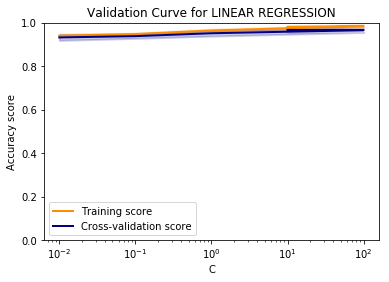

In [64]:
plot_validation_curve(bestEstimators[1], 
                      XTrain, yTrain, 
                      paramGridLR['C'], 
                      'C',
                      'Validation Curve for LINEAR REGRESSION',
                      myCV, 
                      0, 1)

In [65]:
display(results_df_gridsearch["Best estimator parameters"][0])

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

*K Nearest Neighbors*

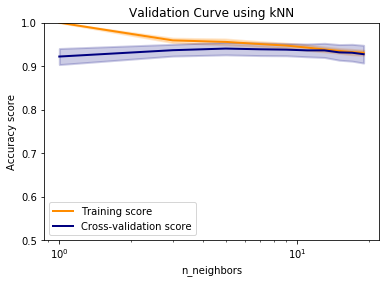

In [67]:
plot_validation_curve(bestEstimators[0], 
                      XTrain, yTrain, 
                      paramGridKNN['n_neighbors'], 
                      'n_neighbors',
                      'Validation Curve using kNN',
                      myCV, 
                      0.5, 1)

*Decision trees*

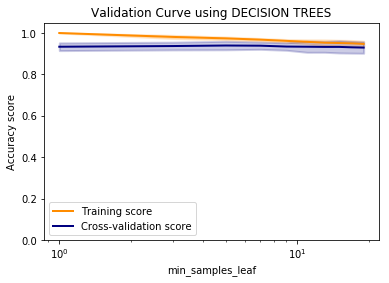

In [69]:
plot_validation_curve(bestEstimators[3], 
                      XTrain, yTrain, 
                      paramGridDT['min_samples_leaf'], 
                      'min_samples_leaf',
                      'Validation Curve using DECISION TREES',
                      myCV, 
                      0, 1.05)

In [70]:
display(results_df_gridsearch["Best estimator parameters"][3])

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.25,
 'min_samples_leaf': 5}

both validation curves are quite close to each other and score is high. Tendency with a higher value seems to be to separate decreasing both CV and train scores.

*Support Vector Machines*

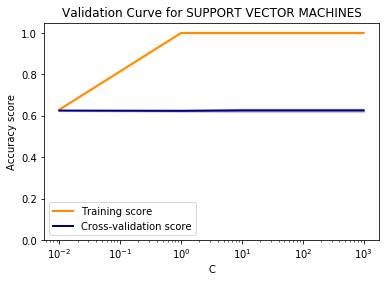

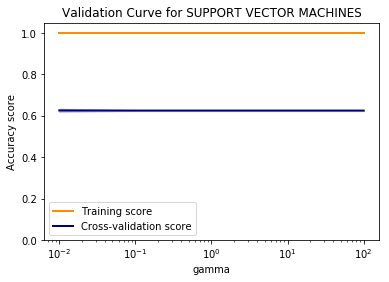

In [71]:
plot_validation_curve(bestEstimators[5], 
                      XTrain, yTrain, 
                      paramGridSVM['C'], 
                      'C',
                      'Validation Curve for SUPPORT VECTOR MACHINES',
                      myCV, 
                      0, 1.05)

plot_validation_curve(bestEstimators[5], 
                      XTrain, yTrain, 
                      paramGridSVM['gamma'], 
                      'gamma',
                      'Validation Curve for SUPPORT VECTOR MACHINES',
                      myCV, 
                      0, 1.05)

In [72]:
display(results_df_gridsearch["Best estimator parameters"][5])

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

score is high and both curves are close to each other. Lower C values would have resulted in low score and under-fitting. Behavior for gamma parameter is inverse, consequently the optimal one was the lowest.

*Multi Layer Perceptron*

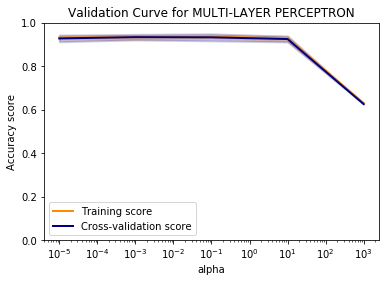

In [73]:
plot_validation_curve(bestEstimators[6], 
                      XTrain, yTrain, 
                      paramGridMLP['alpha'], 
                      'alpha',
                      'Validation Curve for MULTI-LAYER PERCEPTRON',
                      myCV, 
                      0, 1)

In [74]:
display(results_df_gridsearch["Best estimator parameters"][6])

{'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50)}


The obtained optimum alpha for our problem seems to avoid overfitting, as it has the highest train / CV score with low separation between those curves (even if they are lower than in the rest of the models). Let's see later how this model performs with unseen data, getting deeper in the classification of each class of the dataset.

*Random Forest*

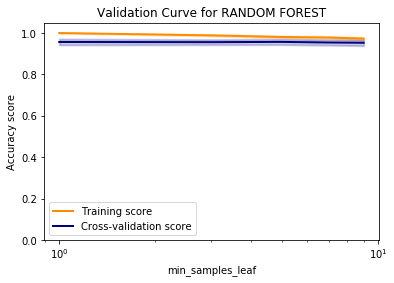

In [75]:
plot_validation_curve(bestEstimators[7], 
                      XTrain, yTrain, 
                      paramGridRF['min_samples_leaf'], 
                      'min_samples_leaf',
                      'Validation Curve for RANDOM FOREST',
                      myCV, 
                      0, 1.05)

In [76]:
display(results_df_gridsearch["Best estimator parameters"][7])

{'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 40}

There is no sign of under-over fitting, as the estimator performed almost perfectly for the entire range of parameters, the best in the area of the obtained optimum parameters, where the score is the highest and there is low distance between both curves.

##  Fit the Best Models 

In [77]:
fitModels = []

for model in bestEstimators:
    fitModel = model.fit(XTrain, yTrain)
    
    fitModels.append(fitModel)

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Evaluate the score on XTest prediction

In [78]:
yTrue = yTest
predictions = []

for fitModel in fitModels:
    yPred = fitModel.predict(XTest)
    
    predictions.append(list(yPred))

Metrics below are some of the suitable metrics for binary targets, as this is the case.

The Accuracy score

In [79]:
accuracy_scores = []

i=0

for prediction in predictions:
    acc_score = accuracy_score(yTrue, prediction)
    accuracy_scores.append(acc_score)
    print(names[i])
    print(acc_score)
    print("\n")
    
    i = i+1

# Append XTest accuracy scores to results
j=0

for result in results:
    result["XTest acc score"] = accuracy_scores[j]
    j = j+1

results_df = pd.DataFrame(results)

K NEAREST NEIGHBORS
0.9298245614035088


LOGISTIC REGRESSION
0.9473684210526315


LINEAR DISCRIMINANT ANALYSIS
0.935672514619883


DECISION TREE
0.9181286549707602


GAUSSIAN NAIVE BAYES
0.9473684210526315


SUPPORT VECTOR MACHINES
0.631578947368421


MULTI-LAYER PERCEPTRON
0.9239766081871345


RANDOM FOREST
0.935672514619883




This is a  Classification report that shows the following scores for each class:

- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- f1-score = (2 · Precision · Recall) / (Precision + Recall)

Where TP=True Positives; FP=False positives; FN=False negatives

In [80]:
i = 0

for prediction in predictions:
    print(names[i])
    print(classification_report(yTrue, prediction))
    
    i = i+1

K NEAREST NEIGHBORS
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.94      0.95      0.94       107

   micro avg       0.93      0.93      0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

   micro avg       0.95      0.95      0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

LINEAR DISCRIMINANT ANALYSIS
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        64
           1       0.91      0.99      0.95       107

   micro avg       0.94      0.94      0.94       171
   macro avg       0.95      0.92      0.93       171
weigh

- Confusion matrix

Confusion matrix provides a deeper knowledge about TP, FP, TN and FN, working as showed in the picture below:

<img src=https://bookdown.org/f_izco/BDC-POC/imagenes/matriz.confusion.png>

In [81]:
# plot confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, horizontalalignment="center")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

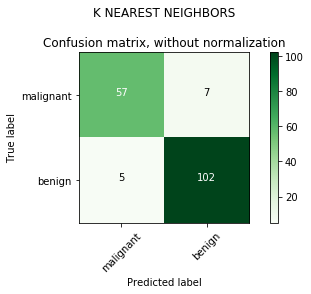

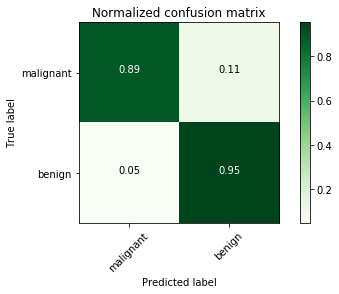

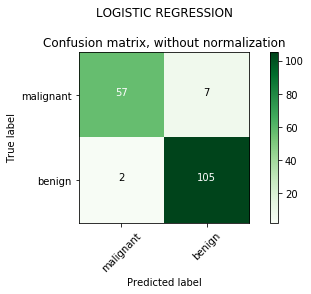

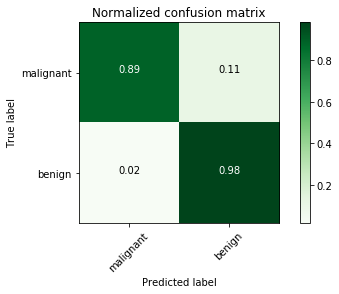

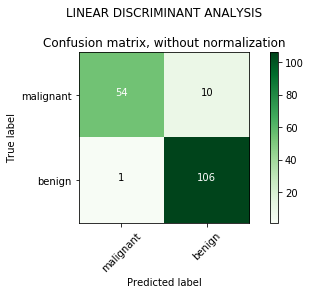

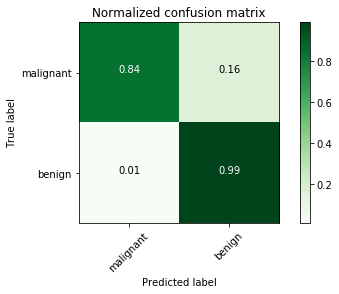

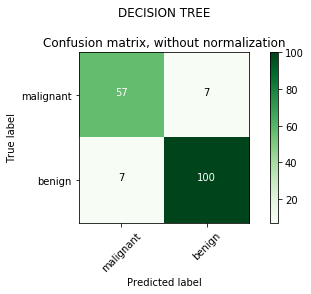

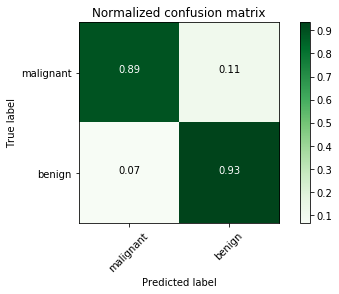

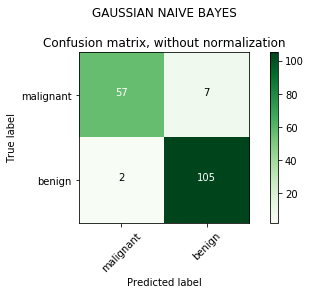

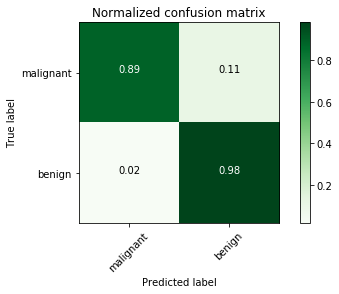

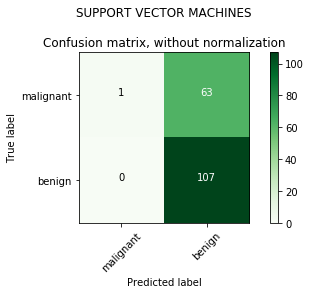

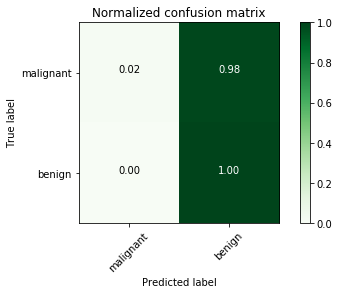

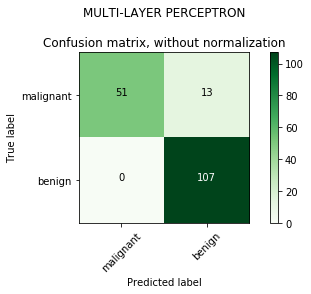

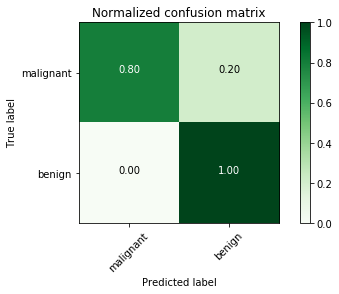

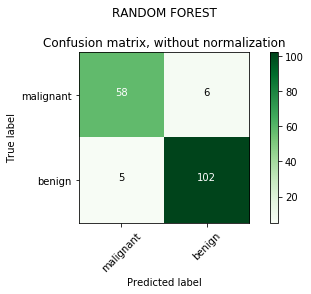

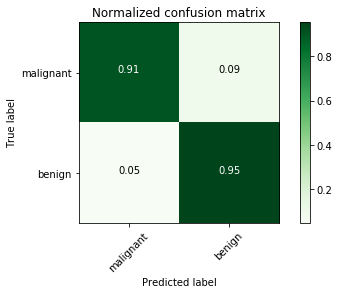

In [82]:
i = 0

for yPred in predictions:
    # Compute confusion matrix
    confMatrix = confusion_matrix(yTrue, yPred)
    np.set_printoptions(precision=2)
        
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(confMatrix, classes=targetNames, title=names[i] + '\n\nConfusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(confMatrix, classes=targetNames, normalize=True, title='Normalized confusion matrix')

    i=i+1

Conclusions from above confusion matrixes are similar to the obtained with classification report, MLP misclassifies a considerable number of XTest malignant samples as benign , which makes its recall lower. We will see this graphically by plotting decision boundaries later.

## CV with the complete dataset

We take the complete dataset and show the estimators brand-new splits, they can be fit and predicted accurately, and with low standard deviation between the splits. For that purpose, we use the cross_val_score function

In [83]:
# Cross-validation of the Best Estimator 
myStratifiedShuffleSplit = StratifiedShuffleSplit(200, 0.3, random_state = 440)

i=0

cv_scores = []

for model in fitModels:
    myCrosValScore = cross_val_score(model, X, y, cv = myStratifiedShuffleSplit)
    
    cv_scores.append(myCrosValScore)
    
    print(names[i])
    print ("Mean accuracy score: " + str(np.mean(myCrosValScore)))
    print ("Std deviation: " + str(np.std(myCrosValScore)) + "\n")
    
    i=i+1

# Append accuracy scores to the results
j=0
for result in results:
    result["(X,y) Mean acc score"] = np.mean(cv_scores[j])
    result["(X,y) Std acc score"] = np.std(cv_scores[j])
    j=j+1

K NEAREST NEIGHBORS
Mean accuracy score: 0.9385087719298245
Std deviation: 0.01511418753649503



/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

LOGISTIC REGRESSION
Mean accuracy score: 0.9561988304093567
Std deviation: 0.014502334453213597

LINEAR DISCRIMINANT ANALYSIS
Mean accuracy score: 0.9558771929824562
Std deviation: 0.013021351302922148

DECISION TREE
Mean accuracy score: 0.934736842105263
Std deviation: 0.01773232107858706

GAUSSIAN NAIVE BAYES
Mean accuracy score: 0.939093567251462
Std deviation: 0.014992645507331426

SUPPORT VECTOR MACHINES
Mean accuracy score: 0.6284795321637427
Std deviation: 0.005356865597382387

MULTI-LAYER PERCEPTRON
Mean accuracy score: 0.9308479532163741
Std deviation: 0.018047711201730814

RANDOM FOREST
Mean accuracy score: 0.9508187134502925
Std deviation: 0.01471536074767691



##### Summary of the results

In [85]:
results_df = pd.DataFrame(results)

# Fucntions for stylying scores and std deviations
def highlight_max_score(data, color='lightgreen'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

def highlight_min_std(data, color = 'lightsalmon'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
    
def highlight_min_score(data, color = 'lightgreen'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
    
def highlight_max_std(data, color='lightsalmon'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)



In [87]:
# Apply styles to the scores
style_max_scores = results_df.style.apply(highlight_max_score, subset=['(XTrain,yTrain) Mean test score',
                                                                       '(XTrain,yTrain) Mean train score',
                                                                       '(XTest) acc score',
                                                                       '(X,y) Mean acc score'
                                                                      ])


style_max_std = results_df.style.apply(highlight_min_std, subset=['(XTrain,yTrain) Std test score',
                                                               '(XTrain,yTrain) Std train score',
                                                               '(X,y) Std acc score'
                                                              ])

style_max_std.use(style_max_scores.export())

style_min_scores = results_df.style.apply(highlight_min_score, subset=['(XTrain,yTrain) Mean test score', 
                                                                '(XTrain,yTrain) Mean train score',
                                                                '(XTest) acc score',
                                                                '(X,y) Mean acc score'
                                                               ])

style_min_scores.use(style_max_std.export())

style_max_std = results_df.style.apply(highlight_max_std, subset=['(XTrain,yTrain) Std test score',
                                                               '(XTrain,yTrain) Std train score',
                                                               '(X,y) Std acc score'
                                                              ])

style_max_std.use(style_min_scores.export()).set_precision(2)

/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,"(X,y) Mean acc score","(X,y) Std acc score","(XTrain,yTrain) Mean test score","(XTrain,yTrain) Mean train score","(XTrain,yTrain) Std test score","(XTrain,yTrain) Std train score",Best estimator parameters,Model,XTest acc score
0,0.94,0.015,0.94,0.96,0.014,0.0067,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}",K NEAREST NEIGHBORS,0.93
1,0.96,0.015,0.97,0.98,0.011,0.0057,{'C': 10},LOGISTIC REGRESSION,0.95
2,0.96,0.013,0.96,0.97,0.01,0.0055,{},LINEAR DISCRIMINANT ANALYSIS,0.94
3,0.93,0.018,0.94,0.97,0.021,0.0067,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.25, 'min_samples_leaf': 5}",DECISION TREE,0.92
4,0.94,0.015,0.94,0.95,0.013,0.0064,{},GAUSSIAN NAIVE BAYES,0.95
5,0.63,0.0054,0.63,1,0.0058,0,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",SUPPORT VECTOR MACHINES,0.63
6,0.93,0.018,0.93,0.93,0.013,0.0095,"{'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50)}",MULTI-LAYER PERCEPTRON,0.92
7,0.95,0.015,0.96,0.98,0.014,0.0051,"{'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 40}",RANDOM FOREST,0.94



- Logistic regression seems to be the best estimator according to (XTrain, yTrain) CV / Train scores, XTest scores and (X,y) scores, but also are the other estimators except for MLP. Standard deviations in all the estimators except for MLP are also very low.
- MLP shows the lowest scores in the diferent steps, as well as the highest standard deviation.

Above we can see that all the models have their accuracy scores from 0.85 above. MLP is the model with the lowest average accuracy score  and highest dispersion degree in the scores, according to the spacing of the box.

- ### Decision boundaries algorithms comparison



In [88]:
def plot_pca_decision_boundaries(model, name):
    print(name)
    # Plot decision regions
    myPCA = PCA(n_components = 2)
    X_PCA = myPCA.fit_transform(X)
    colors = ['red', 'green']

    for i in range(len(colors)):
        xPlotPCA = X_PCA[:, 0][y == i]
        yPlotPCA = X_PCA[:, 1][y == i]
        plt.scatter(xPlotPCA, yPlotPCA, c=colors[i])
        plt.legend(targetNames, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title("PCA Scatter Plot")
    #plt.show()

    model.fit(X_PCA, y)

    xx1, xx2 = np.meshgrid(np.linspace(X_PCA[:,0].min(),X_PCA[:,0].max(),100),np.linspace(X_PCA[:,1].min(),X_PCA[:,1].max(),100))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3)
    plt.axis('tight')
    plt.show()

K NEAREST NEIGHBORS


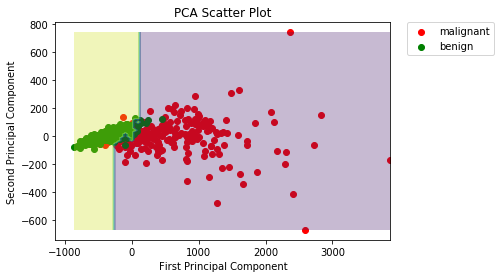

In [89]:
plot_pca_decision_boundaries(fitModels[0], names[0])

We can see that LR performed well with the complete dataset, better with benign than with malignant class. We can see that a considerable number of false negatives is the problem in the classification of malignant class.

LINEAR DISCRIMINANT ANALYSIS


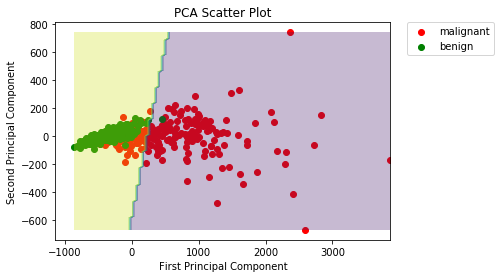

In [90]:
plot_pca_decision_boundaries(fitModels[2], names[2])

LOGISTIC REGRESSION


/Users/Esther_Garate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


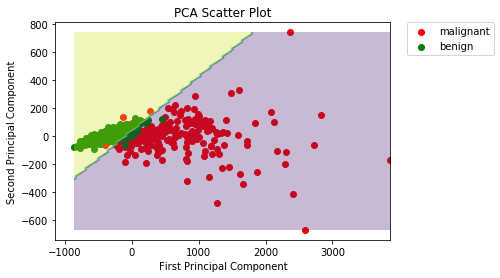

In [91]:
plot_pca_decision_boundaries(fitModels[1], names[1])

Performance of LDA is similar to LR, but in this case the class with more mismatching classifications is benign one (higher number of false positive for this class).

KNN performs in a similar way that the previous two models, maybe better due to the mismatch classification area (mainly in malignant classification area) is slightly smaller.

DECISION TREE


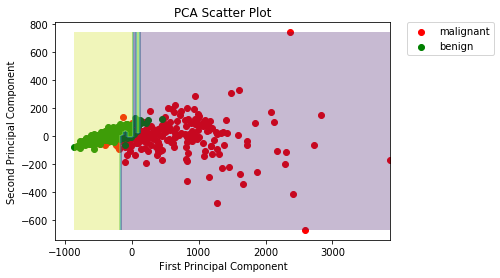

In [92]:
plot_pca_decision_boundaries(fitModels[3], names[3])

DT is taking some noise from the data, as showed in the horizontal line in the middle of the chart. Apart from that, classification is similar to the one achieved by KNN but worse (bigger area of mismatched samples)

GAUSSIAN NAIVE BAYES


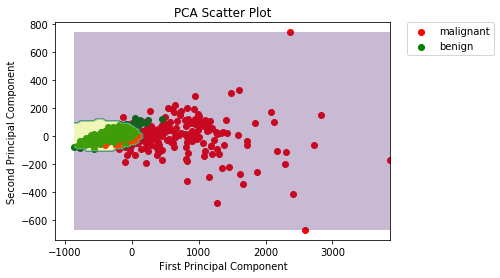

In [93]:
plot_pca_decision_boundaries(fitModels[4], names[4])

GNV classifies in a different way from the models above, defining a path around benign samples for their classification. The class penalized here is malignant, which mismatches benign samples as the opposite class.

SUPPORT VECTOR MACHINES


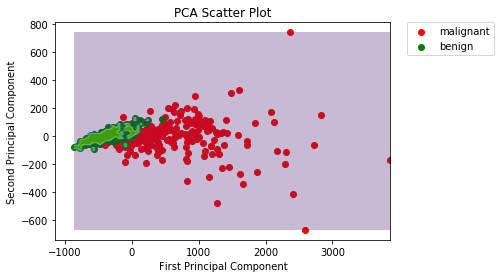

In [94]:
plot_pca_decision_boundaries(fitModels[5], names[5])

SVM classifies the classes in a similar way to GNV.

MULTI-LAYER PERCEPTRON


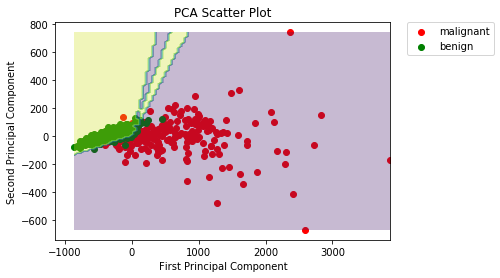

In [95]:
plot_pca_decision_boundaries(fitModels[6], names[6])

MLP with the selected parameters makes a linear division between both classes in a way similar to LDA and LR but slightly worse in terms of the size of the area misclassified. It is a situation closer to underfitting.

RANDOM FOREST


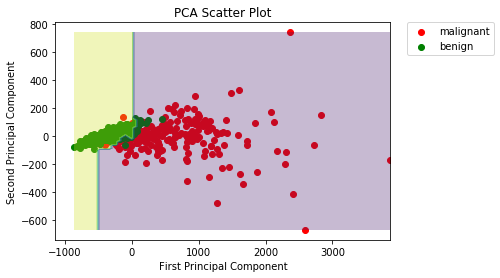

In [96]:
plot_pca_decision_boundaries(fitModels[7], names[7])

- Learning curves algorithms comparison

We will display scores instead of error to evaluate these curves:

In [97]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

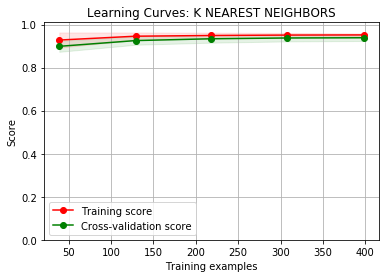

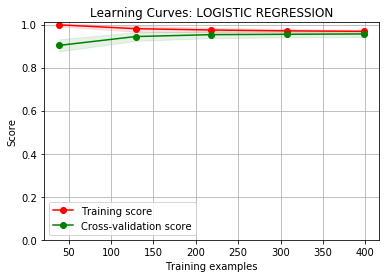

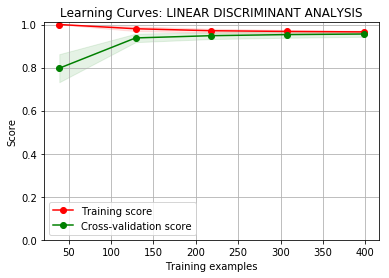

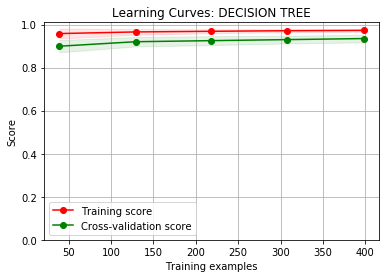

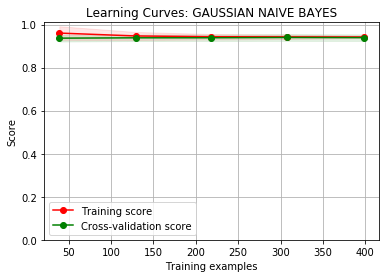

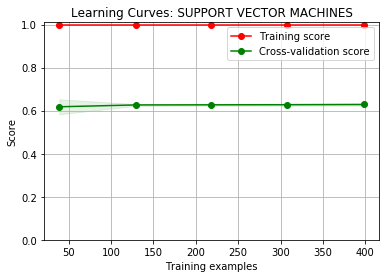

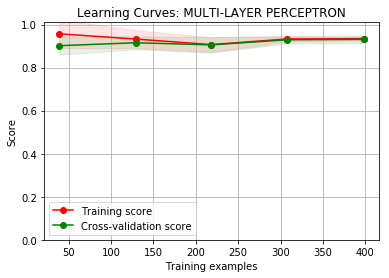

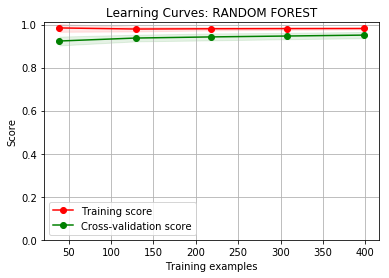

In [98]:
i=0
for model in fitModels:
    title = "Learning Curves: " + names[i]

    plot_learning_curve(model, title, X, y, ylim=(0, 1.01), cv=myStratifiedShuffleSplit, n_jobs=4)

    plt.show()
    i=i+1